### Downloading the file and setting as Dataframe

In [89]:
# importing required libraries
import pandas as pd 
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from spacy import displacy, load
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
data=pd.read_csv("apple-twitter-sentiment-texts.csv")

In [3]:
# print first 5 rows
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


### Remove punctuations

In [4]:
data["punc_text"] = data['text'].str.replace('[{}]'.format(string.punctuation), '')

In [5]:
data.punc_text

0       Wow Yall needa step it up Apple RT heynyla Mus...
1       What Happened To Apple Inc   httptcoFJEXI3oP0U...
2       Thank u apple I can now compile all of the pic...
3       The oddly uplifting story of the Apple cofound...
4       apple can i exchange my iphone for a different...
                              ...                        
1625          Those PICK UP THE SLACK YOU FUCK BOYS Apple
1626    Finally got my iPhone 6 in the mail and it com...
1627    umogames Apple ended up getting a new computer...
1628    The 19YearOld WizKid Who Turned Down Apple Has...
1629    The iPhone 6 May Have A Longer Upgrade Cycle  ...
Name: punc_text, Length: 1630, dtype: object

### Remove special characters

In [6]:
data["spl_text"] = data['punc_text'].str.replace("[^A-Za-z0-9]+"," ")

In [7]:
data["spl_text"]

0       Wow Yall needa step it up Apple RT heynyla Mus...
1       What Happened To Apple Inc httptcoFJEXI3oP0U a...
2       Thank u apple I can now compile all of the pic...
3       The oddly uplifting story of the Apple cofound...
4       apple can i exchange my iphone for a different...
                              ...                        
1625          Those PICK UP THE SLACK YOU FUCK BOYS Apple
1626    Finally got my iPhone 6 in the mail and it com...
1627    umogames Apple ended up getting a new computer...
1628    The 19YearOld WizKid Who Turned Down Apple Has...
1629    The iPhone 6 May Have A Longer Upgrade Cycle I...
Name: spl_text, Length: 1630, dtype: object

### Remove stopwords 

In [8]:
data['tokenized_text'] = data['spl_text'].apply(word_tokenize)

In [9]:
stop = stopwords.words('english')

In [10]:
data['stop_text'] = data['tokenized_text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
data["stop_text"]

0       [Wow, Yall, needa, step, Apple, RT, heynyla, M...
1       [What, Happened, To, Apple, Inc, httptcoFJEXI3...
2       [Thank, u, apple, I, compile, pics, communicat...
3       [The, oddly, uplifting, story, Apple, cofounde...
4       [apple, exchange, iphone, different, color, lm...
                              ...                        
1625    [Those, PICK, UP, THE, SLACK, YOU, FUCK, BOYS,...
1626    [Finally, got, iPhone, 6, mail, comes, box, bu...
1627    [umogames, Apple, ended, getting, new, compute...
1628    [The, 19YearOld, WizKid, Who, Turned, Down, Ap...
1629    [The, iPhone, 6, May, Have, A, Longer, Upgrade...
Name: stop_text, Length: 1630, dtype: object

### Convert text to lower case

In [12]:
data['low_text'] = data['stop_text'].apply(lambda x: [word.lower() for word in x ])

In [13]:
data["low_text"]

0       [wow, yall, needa, step, apple, rt, heynyla, m...
1       [what, happened, to, apple, inc, httptcofjexi3...
2       [thank, u, apple, i, compile, pics, communicat...
3       [the, oddly, uplifting, story, apple, cofounde...
4       [apple, exchange, iphone, different, color, lm...
                              ...                        
1625    [those, pick, up, the, slack, you, fuck, boys,...
1626    [finally, got, iphone, 6, mail, comes, box, bu...
1627    [umogames, apple, ended, getting, new, compute...
1628    [the, 19yearold, wizkid, who, turned, down, ap...
1629    [the, iphone, 6, may, have, a, longer, upgrade...
Name: low_text, Length: 1630, dtype: object

### Create two objects X and y

In [14]:
X=data["low_text"]
y=data['sentiment']

### Creating CountVectorizer object 

In [15]:
# Create our vectorizer
vectorizer = CountVectorizer(analyzer=lambda x: x)

### Split the data into training and testing sets

In [16]:
# Get the training vectors
X_vectors = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.25, random_state=42)

### Training of MultinomialNB model

In [76]:
# Build the classifier
clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Train the classifier
clf.fit(X_train, y_train)

MultinomialNB()

In [77]:
# Get the test vectors
X_test.shape

(489, 5282)

In [86]:
y.value_counts()

 0    801
-1    686
 1    143
Name: sentiment, dtype: int64

In [78]:
X_train.shape

(1141, 5282)

In [79]:
# Predict and score the vectors
pred = clf.predict(X_test)


### Display the Confusion Matrix 

In [80]:
# print the accuracy score
accuracy_score(y_test, pred)


0.7811860940695297

In [82]:
# print the confusion matrix
cm=confusion_matrix(y_test, pred)
print('The confusion matrix is :')
print('')
print(cm)

The confusion matrix is :

[[189  14   1]
 [ 57 182   8]
 [ 17  10  11]]


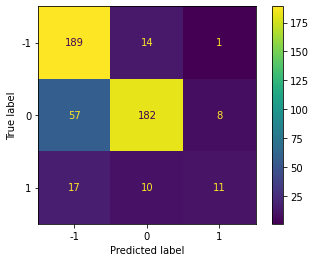

In [90]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

### Display the POS tagging on the first 4 rows of ‘Review’

In [60]:
# print first four rows of 'Review'
new_data = pd.DataFrame().assign(Review=data['text']).head(4)
new_data

,Review
0,Wow. Yall needa step it up @Apple RT @heynyla:...
1,What Happened To Apple Inc? http://t.co/FJEX...
2,Thank u @apple I can now compile all of the pi...
3,The oddly uplifting story of the Apple co-foun...


In [62]:
new_data['tokenized_review'] = new_data['Review'].apply(word_tokenize)
new_data.head()

,Review,tokenized_review
0,Wow. Yall needa step it up @Apple RT @heynyla:...,"[Wow, ., Yall, needa, step, it, up, @, Apple, ..."
1,What Happened To Apple Inc? http://t.co/FJEX...,"[What, Happened, To, Apple, Inc, ?, http, :, /..."
2,Thank u @apple I can now compile all of the pi...,"[Thank, u, @, apple, I, can, now, compile, all..."
3,The oddly uplifting story of the Apple co-foun...,"[The, oddly, uplifting, story, of, the, Apple,..."


In [91]:
print('Displaying the POS tags: ')
for i in new_data['tokenized_review']:
    wordnet_lemmatizer = WordNetLemmatizer()
    keywords=[w for w in i if w in wordnet_lemmatizer.lemmatize(w)]
    print('')
    print('Tokenized word:')
    print(i)
    print('')
    print('POS tag:')
    print(pos_tag(keywords))
    
    

Displaying the POS tags: 

Tokenized word:
['Wow', '.', 'Yall', 'needa', 'step', 'it', 'up', '@', 'Apple', 'RT', '@', 'heynyla', ':', 'Music', 'and', 'snapchat', 'at', 'the', 'same', 'damn', 'time', '.', 'Thank', 'you', '#', 'Note4']

POS tag:
[('Wow', 'NNP'), ('.', '.'), ('Yall', 'NNP'), ('needa', 'JJ'), ('step', 'NN'), ('it', 'PRP'), ('up', 'RP'), ('@', 'JJ'), ('Apple', 'NNP'), ('RT', 'NNP'), ('@', 'NNP'), ('heynyla', 'NN'), (':', ':'), ('Music', 'JJ'), ('and', 'CC'), ('snapchat', 'WP'), ('at', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('damn', 'NN'), ('time', 'NN'), ('.', '.'), ('Thank', 'NNP'), ('you', 'PRP'), ('#', '#'), ('Note4', 'NNP')]

Tokenized word:
['What', 'Happened', 'To', 'Apple', 'Inc', '?', 'http', ':', '//t.co/FJEXI3oP0U', '#', 'aapl', '#', 'apple', '@', 'MoneyPress', 'http', ':', '//t.co/wXKmmTMArW']

POS tag:
[('What', 'WP'), ('Happened', 'VBD'), ('To', 'TO'), ('Apple', 'NNP'), ('Inc', 'NNP'), ('?', '.'), ('http', 'NN'), (':', ':'), ('//t.co/FJEXI3oP0U', 'JJ'), ('#', '#

### Build and display a dependency parser tree

Sentence : “He is one of the five black brothers who sit in judgment of Jon Snow for his actions during his time with the wildlings.” 

In [37]:
# Load the language model
nlp = load("en_core_web_sm")

sentence = "He is one of the five black brothers who sit in judgment of Jon Snow for his actions during his time with the wildlings."

doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

# Print the token, dependency nature, head and all dependents of the token

for token in doc:
    print ("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))


Token           | Relation | Head            | Children            
----------------------------------------------------------------------
He              | nsubj    | is              | []                  
is              | ROOT     | is              | [He, one, .]        
one             | attr     | is              | [of]                
of              | prep     | one             | [brothers]          
the             | det      | brothers        | []                  
five            | nummod   | brothers        | []                  
black           | amod     | brothers        | []                  
brothers        | pobj     | of              | [the, five, black, sit]
who             | nsubj    | sit             | []                  
sit             | relcl    | brothers        | [who, in, for]      
in              | prep     | sit             | [judgment]          
judgment        | pobj     | in              | [of]                
of              | prep     | judgment     

### Displaying the dependancy parser

In [38]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})